## Information Extraction

Code implementations for below topics:

1. Part of Speech (POS)
2. Named Entity Recognition (NER)
3. N-Grams

Dataset Link - https://www.kaggle.com/snapcrack/all-the-news

Dataset Name - articles1.csv (50,000 news articles)

Dataset Description - News articles from 5 American publications



### **Load .csv dataset into a pandas dataframe**

In [1]:
# reading the csv into a pandas dataframe
import pandas as pd

news_articles_df = pd.read_csv('articles1.csv')

nRow, nCol = news_articles_df.shape
print(f'There are {nRow} rows and {nCol} columns')

news_articles_df.head()

There are 50000 rows and 10 columns


,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


In [2]:
#dropping the first unnames column (axis = 1 means it's column-wise operation. So Column 0 will be dropped)

news_articles_df = news_articles_df.drop(news_articles_df.columns[0], axis = 1) 

nRow, nCol = news_articles_df.shape
print(f'There are {nRow} rows and {nCol} columns')

news_articles_df.head()

There are 50000 rows and 9 columns


,id,title,publication,author,date,year,month,url,content
0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


### **Describe the data**

In [3]:
# getting basic info about the dataset

news_articles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           50000 non-null  int64  
 1   title        50000 non-null  object 
 2   publication  50000 non-null  object 
 3   author       43694 non-null  object 
 4   date         50000 non-null  object 
 5   year         50000 non-null  float64
 6   month        50000 non-null  float64
 7   url          0 non-null      float64
 8   content      50000 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 3.4+ MB


In [4]:
# checking for null values, if any

news_articles_df.isnull().sum()

id                 0
title              0
publication        0
author          6306
date               0
year               0
month              0
url            50000
content            0
dtype: int64

### **EDA of the dataset**

<AxesSubplot:xlabel='Publications', ylabel='Counts'>

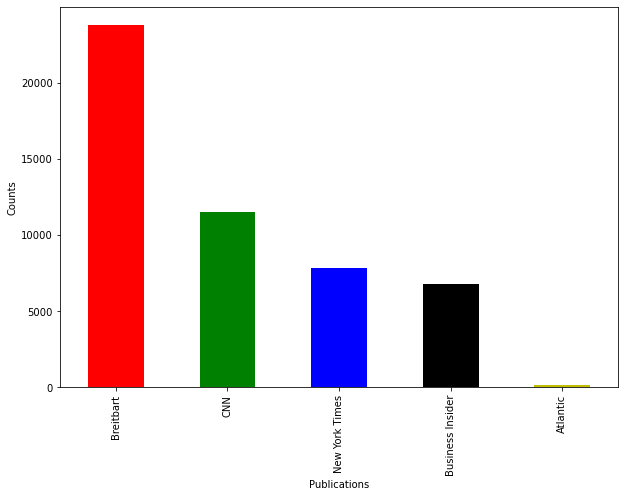

In [5]:
# Visualization of news publications names and article count in the dataset

import matplotlib.pyplot as plt

color_list = list('rgbkymc')  #red, green, blue, black, etc.
plt.figure(figsize=(10,7))

plt.xlabel("Publications")
plt.ylabel("Counts")

news_articles_df.publication.value_counts().plot(kind='bar', color=color_list)



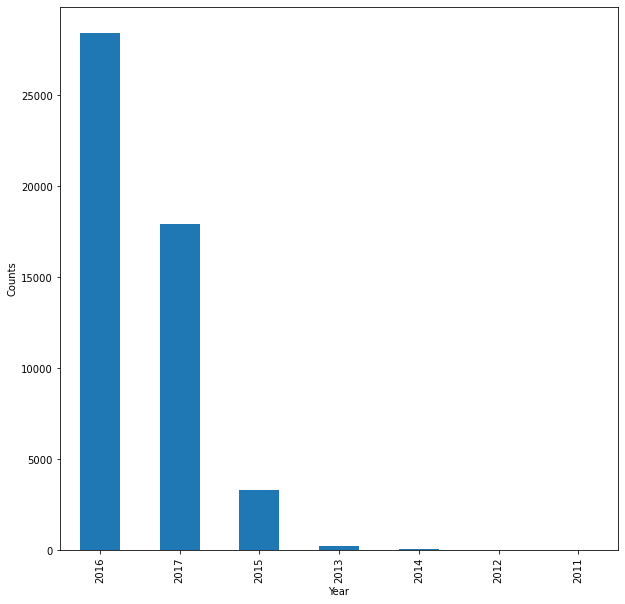

In [6]:
# Visualization of news article count per year

news_articles_df['year'] = news_articles_df['year'].map(int).map(str)
news_articles_df['year'] = pd.to_datetime(news_articles_df['year'], format='%Y').dt.strftime('%Y')
news_articles_df = news_articles_df.sort_values(by='year')

plt.figure(figsize=(10,10))
plt.xlabel("Year")
plt.ylabel("Counts")

news_articles_df.year.value_counts().plot(kind='bar')
plt.show()

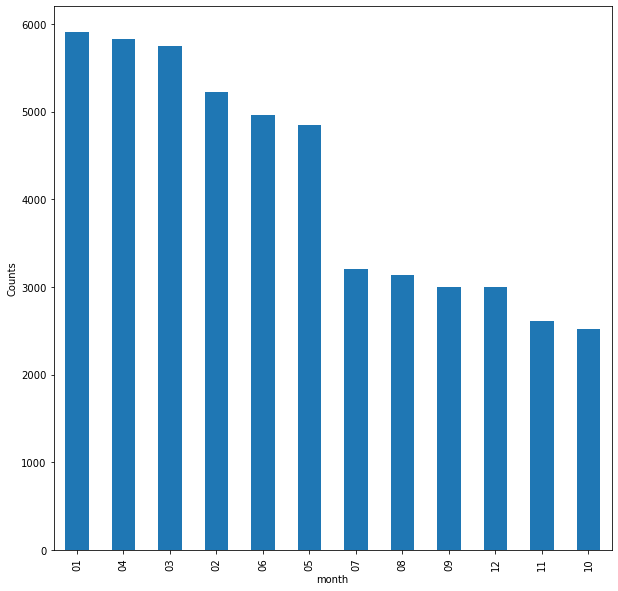

In [7]:
# Visualization of news article count released monthly to observe if any pattern exists 

news_articles_df['month'] = news_articles_df['month'].map(int).map(str)
news_articles_df['month'] = pd.to_datetime(news_articles_df['month'], format='%m').dt.strftime('%m')
news_articles_df = news_articles_df.sort_values(by='month')

plt.figure(figsize=(10,10))
plt.xlabel("month")
plt.ylabel("Counts")

news_articles_df.month.value_counts().plot(kind='bar')
plt.show()

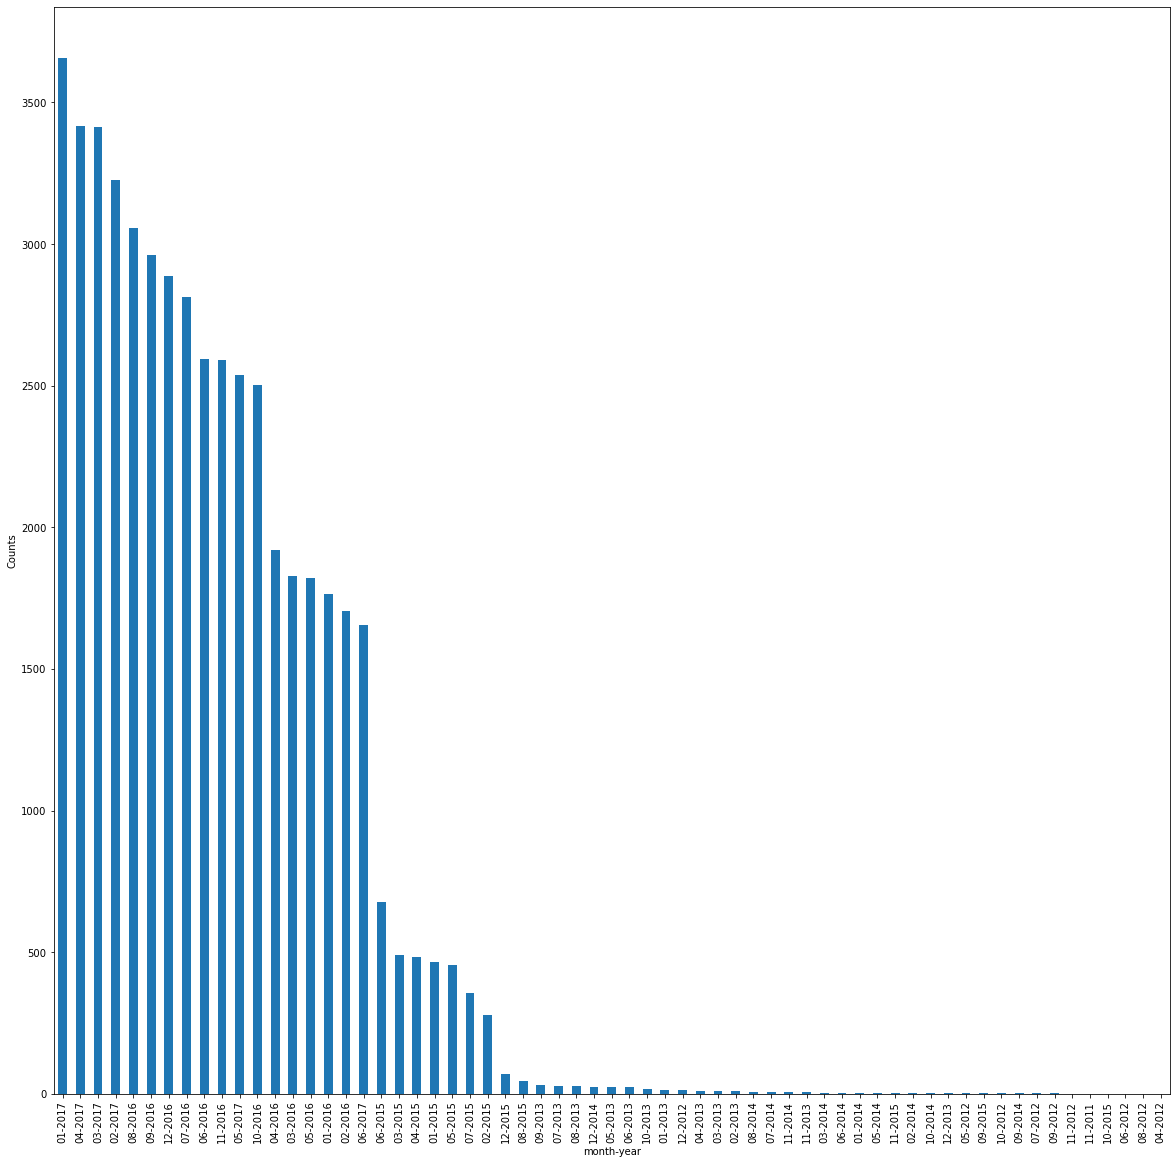

In [8]:
# Visualization of news article count per month-year

news_articles_df['my'] = news_articles_df['month'].map(int).map(str) + '-' + news_articles_df['year'].map(int).map(str)
news_articles_df['my'] = pd.to_datetime(news_articles_df['my'], format='%m-%Y').dt.strftime('%m-%Y')
news_articles_df = news_articles_df.sort_values(by='my')

plt.figure(figsize=(20,20))
plt.xlabel("month-year")
plt.ylabel("Counts")

news_articles_df.my.value_counts().plot(kind='bar')
plt.show()

### For the next phase of analysing, we will consider only the "Title" column

In [9]:
# initializing a new dataframe with only the title column for faster operation 

title_df = news_articles_df['title']
title_df = title_df.to_frame()

title_df.sample(10, random_state = 5)

,title
6556,Reince Priebus Urges G.O.P. Unity Behind Trump...
16577,Report: 97 Percent of DOJ Employee Political D...
13476,Hungary: EU Soros Puppets Attack Us For Fighti...
26922,Hillary Clinton Booed at Debate for Madeleine ...
12475,Goldman Sachs CEO: Trump’s Executive Order on ...
17325,Paris Cardinal: Islamists Worship a ‘God of De...
14057,Calls Grow to Use National Guard to Protect Co...
920,White House Says Bathrobe Anecdote Is All Wet ...
33268,Border mystery: Where are the immigrants?
34286,Earth Day Fast Facts


<AxesSubplot:xlabel='title length', ylabel='No. of articles'>

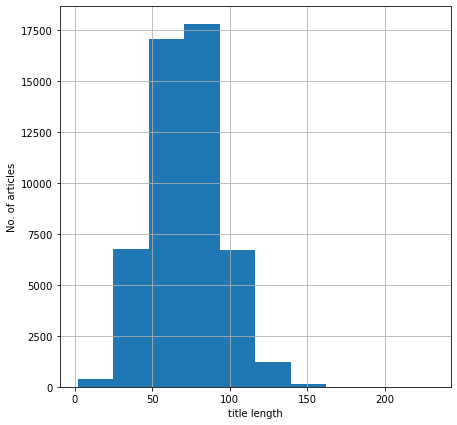

In [10]:
# visualizing title length

plt.figure(figsize=(7,7))
plt.xlabel("title length")
plt.ylabel("No. of articles")

title_df['title'].str.len().hist()

## **Part of Speech Tagging**

In [20]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91988\AppData\Roaming\nltk_data...
[nltk_data] Error downloading 'punkt' from
[nltk_data]     <https://raw.githubusercontent.com/nltk/nltk_data/gh-
[nltk_data]     pages/packages/tokenizers/punkt.zip>:   [WinError
[nltk_data]     10053] An established connection was aborted by the
[nltk_data]     software in your host machine


In [14]:
# Contraction Mapping

import contractions

In [15]:
title_df['title'] = title_df['title'].apply(lambda x: [contractions.fix(word) for word in x.split()])
title_df.sample(10, random_state = 5)

,title
6556,"[Reince, Priebus, Urges, G.O.P., Unity, Behind..."
16577,"[Report:, 97, Percent, of, DOJ, Employee, Poli..."
13476,"[Hungary:, EU, Soros, Puppets, Attack, Us, For..."
26922,"[Hillary, Clinton, Booed, at, Debate, for, Mad..."
12475,"[Goldman, Sachs, CEO:, Trump’s, Executive, Ord..."
17325,"[Paris, Cardinal:, Islamists, Worship, a, ‘God..."
14057,"[Calls, Grow, to, Use, National, Guard, to, Pr..."
920,"[White, House, Says, Bathrobe, Anecdote, Is, A..."
33268,"[Border, mystery:, Where, are, the, immigrants?]"
34286,"[Earth, Day, Fast, Facts]"


In [16]:
#joining back the list of items into one string

title_df['title'] = [' '.join(map(str, l)) for l in title_df['title']]
title_df.sample(10, random_state = 5)

,title
6556,Reince Priebus Urges G.O.P. Unity Behind Trump...
16577,Report: 97 Percent of DOJ Employee Political D...
13476,Hungary: EU Soros Puppets Attack Us For Fighti...
26922,Hillary Clinton Booed at Debate for Madeleine ...
12475,Goldman Sachs CEO: Trump’s Executive Order on ...
17325,Paris Cardinal: Islamists Worship a ‘God of De...
14057,Calls Grow to Use National Guard to Protect Co...
920,White House Says Bathrobe Anecdote Is All Wet ...
33268,Border mystery: Where are the immigrants?
34286,Earth Day Fast Facts


In [17]:
# you can explore individual cells like this

print(title_df['title'][0])
print(type(title_df['title'][0]))

House Republicans Fret About Winning Their Health Care Suit - The New York Times
<class 'str'>


In [18]:
# Noise Cleaning - spacing, special characters, lowercasing 

import regex as re
title_df['title'] = title_df['title'].str.lower()
title_df['title'] = title_df['title'].apply(lambda x: re.sub(r'[^\w\d\s\']+', '', x))

title_df.sample(10, random_state = 5)

,title
6556,reince priebus urges gop unity behind trump t...
16577,report 97 percent of doj employee political do...
13476,hungary eu soros puppets attack us for fightin...
26922,hillary clinton booed at debate for madeleine ...
12475,goldman sachs ceo trumps executive order on im...
17325,paris cardinal islamists worship a god of death
14057,calls grow to use national guard to protect co...
920,white house says bathrobe anecdote is all wet ...
33268,border mystery where are the immigrants
34286,earth day fast facts


Regex explanation:

1. [^] matches everything but everything inside the blockquotes
2. \w matches any word character (equal to [a-zA-Z0-9_])
3. \d matches a digit (equal to [0-9])
4. \s matches any whitespace character (equal to [\r\n\t\f\v ])
5. \' matches the character ' literally (case sensitive)
6. '+' matches between one and unlimited times, as many times as possible, giving back as needed

## nltk tokenization

In [22]:
nltk.download('punkt')
title_df['tokenized_title'] = title_df['title'].apply(word_tokenize)
title_df.sample(10, random_state = 5)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91988\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


,title,tokenized_title
6556,reince priebus urges gop unity behind trump t...,"[reince, priebus, urges, gop, unity, behind, t..."
16577,report 97 percent of doj employee political do...,"[report, 97, percent, of, doj, employee, polit..."
13476,hungary eu soros puppets attack us for fightin...,"[hungary, eu, soros, puppets, attack, us, for,..."
26922,hillary clinton booed at debate for madeleine ...,"[hillary, clinton, booed, at, debate, for, mad..."
12475,goldman sachs ceo trumps executive order on im...,"[goldman, sachs, ceo, trumps, executive, order..."
17325,paris cardinal islamists worship a god of death,"[paris, cardinal, islamists, worship, a, god, ..."
14057,calls grow to use national guard to protect co...,"[calls, grow, to, use, national, guard, to, pr..."
920,white house says bathrobe anecdote is all wet ...,"[white, house, says, bathrobe, anecdote, is, a..."
33268,border mystery where are the immigrants,"[border, mystery, where, are, the, immigrants]"
34286,earth day fast facts,"[earth, day, fast, facts]"


### Now removing stopwords 

In [24]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

title_df['tokenized_title'] = title_df['tokenized_title'].apply(lambda x: [word for word in x if word not in stop_words])
title_df['tokenized_title_join'] = [' '.join(map(str, l)) for l in title_df['tokenized_title']]

title_df.sample(10, random_state = 5)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91988\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


,title,tokenized_title,tokenized_title_join
6556,reince priebus urges gop unity behind trump t...,"[reince, priebus, urges, gop, unity, behind, t...",reince priebus urges gop unity behind trump ne...
16577,report 97 percent of doj employee political do...,"[report, 97, percent, doj, employee, political...",report 97 percent doj employee political donat...
13476,hungary eu soros puppets attack us for fightin...,"[hungary, eu, soros, puppets, attack, us, figh...",hungary eu soros puppets attack us fighting ma...
26922,hillary clinton booed at debate for madeleine ...,"[hillary, clinton, booed, debate, madeleine, a...",hillary clinton booed debate madeleine albrigh...
12475,goldman sachs ceo trumps executive order on im...,"[goldman, sachs, ceo, trumps, executive, order...",goldman sachs ceo trumps executive order immig...
17325,paris cardinal islamists worship a god of death,"[paris, cardinal, islamists, worship, god, death]",paris cardinal islamists worship god death
14057,calls grow to use national guard to protect co...,"[calls, grow, use, national, guard, protect, c...",calls grow use national guard protect coulter ...
920,white house says bathrobe anecdote is all wet ...,"[white, house, says, bathrobe, anecdote, wet, ...",white house says bathrobe anecdote wet new yor...
33268,border mystery where are the immigrants,"[border, mystery, immigrants]",border mystery immigrants
34286,earth day fast facts,"[earth, day, fast, facts]",earth day fast facts


In [26]:
nltk.download('averaged_perceptron_tagger')
# for sake of simplicity, showing 10 titles based on the same seed value at 5
tagged_stanzas = []
tagged = []

for word in title_df['tokenized_title'].sample(10, random_state = 5):
  tagged_word = nltk.pos_tag(word)
  print(tagged_word)

  tagged_stanzas.append(tagged_word)

# This format is needed for below visualizer as in takes only two values. If you skip this format, it might give you - "too many values to unpack error" 
tagged.append(tagged_stanzas)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\91988\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


[('reince', 'NN'), ('priebus', 'NN'), ('urges', 'VBZ'), ('gop', 'VBP'), ('unity', 'NN'), ('behind', 'IN'), ('trump', 'JJ'), ('new', 'JJ'), ('york', 'NN'), ('times', 'NNS')]
[('report', 'NN'), ('97', 'CD'), ('percent', 'NN'), ('doj', 'NN'), ('employee', 'NN'), ('political', 'JJ'), ('donations', 'NNS'), ('went', 'VBD'), ('clinton', 'NN')]
[('hungary', 'JJ'), ('eu', 'NN'), ('soros', 'JJ'), ('puppets', 'NNS'), ('attack', 'VBP'), ('us', 'PRP'), ('fighting', 'VBG'), ('mass', 'NN'), ('migration', 'NN')]
[('hillary', 'JJ'), ('clinton', 'NN'), ('booed', 'NN'), ('debate', 'NN'), ('madeleine', 'NN'), ('albrights', 'NNS'), ('special', 'JJ'), ('place', 'NN'), ('hell', 'NN'), ('breitbart', 'NN')]
[('goldman', 'NN'), ('sachs', 'VBZ'), ('ceo', 'JJ'), ('trumps', 'NNS'), ('executive', 'NN'), ('order', 'NN'), ('immigration', 'NN'), ('policy', 'NN'), ('support', 'NN')]
[('paris', 'JJ'), ('cardinal', 'JJ'), ('islamists', 'NNS'), ('worship', 'VBP'), ('god', 'JJ'), ('death', 'NN')]
[('calls', 'NNS'), ('grow'

In [27]:
# Yellow Brick is a POS visualizer - https://github.com/DistrictDataLabs/yellowbrick/blob/master/docs/api/text/postag.rst
# You may need to reload the workbook to activate it. In that case, re-run all cells again from the beginning 

!pip install -U yellowbrick

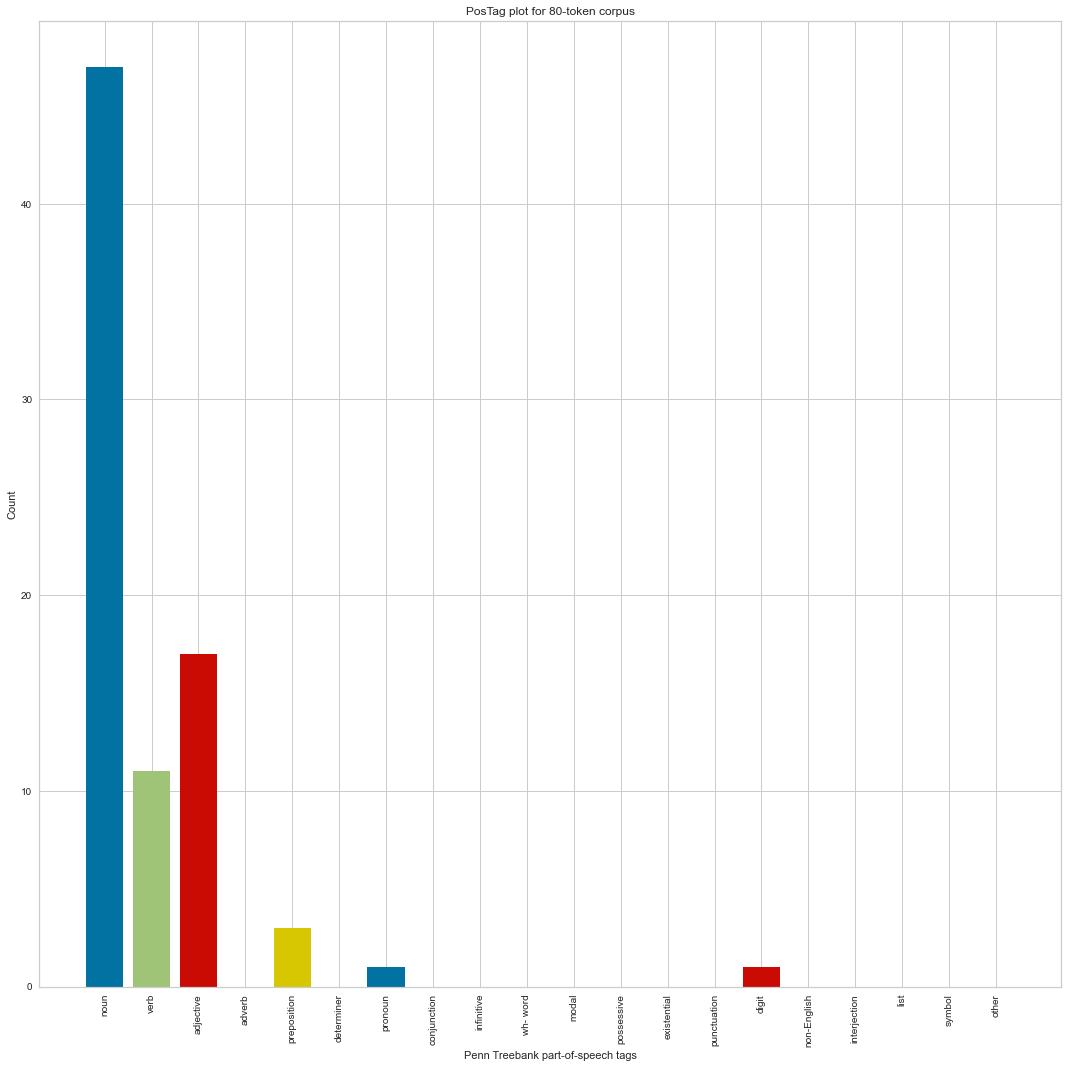

<AxesSubplot:title={'center':'PosTag plot for 80-token corpus'}, xlabel='Penn Treebank part-of-speech tags', ylabel='Count'>

In [28]:
# Create the visualizer

from yellowbrick.text import PosTagVisualizer
plt.figure(figsize=(15,15))
viz = PosTagVisualizer()
viz.fit(tagged)
viz.show()


### Some example of POS Tags - via Universal Tagger
Refer: http://www.nltk.org/book/ch05.html

![alt text](https://miro.medium.com/max/700/1*bDMdq-EpaAr2fLTN84Ljgg.png)

### Now we will explore some **SpaCy** functionalities

In [29]:
!pip install spacy
!python -m spacy download en_core_web_sm

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\91988\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\91988\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "C:\Users\91988\anaconda3\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 62, in read
    data = self.__fp.read(amt)
  File "C:\Users\91988\anaconda3\lib\http\client.py", line 462, in read
    n = self.readinto(b)
  File "C:\Users\91988\anaconda3\lib\http\client.py", line 506, in readinto
    n = self.fp.readinto(b)
  File "C:\Users\91988\anaconda3\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\91988\anaconda3\lib\ssl.py", line 1241, in recv_into
    return self.read(nbytes, buffer)
  File "C:\Users\91988\anaconda3\lib\ssl.py", line 1099, in read
    return self._sslobj.read(len, buffer)
soc

In [30]:
import spacy
nlp = spacy.load('en_core_web_sm')
nlp

### Shallow Parsing using SpaCy

In [31]:
# Extract Noun Phrases

for sentence in title_df['title'].sample(5, random_state = 5):
  print("Sentence is: ", sentence)
  sentence_doc = nlp(sentence)

  for chunk in sentence_doc.noun_chunks:
    print ("Chunked noun phrases found: ",chunk)
  print()

Sentence is:  reince priebus urges gop unity behind trump  the new york times
Chunked noun phrases found:  reince priebus
Chunked noun phrases found:  gop unity
Chunked noun phrases found:  trump
Chunked noun phrases found:  the new york times

Sentence is:  report 97 percent of doj employee political donations went to clinton
Chunked noun phrases found:  97 percent
Chunked noun phrases found:  doj employee
Chunked noun phrases found:  political donations
Chunked noun phrases found:  clinton

Sentence is:  hungary eu soros puppets attack us for fighting mass migration
Chunked noun phrases found:  hungary eu
Chunked noun phrases found:  soros puppets
Chunked noun phrases found:  us
Chunked noun phrases found:  mass migration

Sentence is:  hillary clinton booed at debate for madeleine albrights special place in hell  breitbart
Chunked noun phrases found:  hillary clinton
Chunked noun phrases found:  debate
Chunked noun phrases found:  madeleine albrights special place
Chunked noun phras

### Named Entity Recognition (NER) with SpaCy

In [34]:
from spacy import displacy
for sentence in title_df['title'].sample(5, random_state = 5):
  print("Sentence is: ", sentence)
  sentence_doc = nlp(sentence)
  displacy.render(sentence_doc,style='ent',jupyter=True)
  print()

Sentence is:  reince priebus urges gop unity behind trump  the new york times



Sentence is:  report 97 percent of doj employee political donations went to clinton



Sentence is:  hungary eu soros puppets attack us for fighting mass migration



Sentence is:  hillary clinton booed at debate for madeleine albrights special place in hell  breitbart



Sentence is:  goldman sachs ceo trumps executive order on immigration not a policy we support


In [35]:
# now let's take a look at one whole piece of news to get a better context of NER extractions

for sentence in news_articles_df['content'].sample(1, random_state = 5):
  print("Sentence is: ", sentence)
  sentence_doc = nlp(sentence)
  displacy.render(sentence_doc,style='ent',jupyter=True)
  

Sentence is:  Reince Priebus, the chairman of the Republican National Committee, urged unity behind Donald J. Trump in a series of interviews on Sunday television shows and said that “people just don’t care” about recent negative reports about his tax returns and his treatment of women. During an appearance on “Fox News Sunday,” Mr. Priebus defended Mr. Trump after an article in The New York Times on Saturday in which dozens of women who encountered Mr. Trump over his career told of unsettling conduct. Asked by Chris Wallace, the host, if he was bothered by the accusations in the article, Mr. Priebus at first said that “Well, you know, a lot of things bother me, Chris, and obviously I’m the wrong person to be asking that particular question,” but when asked again, Mr. Priebus said that voters were focused on other things. “I don’t think Donald Trump in his personal life is something that people are looking at and saying, ‘Well, I’m surprised that he has had girlfriends in the past.’ Th

In [40]:
from tqdm import tqdm, tqdm_notebook

nlp = spacy.load('en_core_web_sm',
                 disable=['parser', 
                          'tagger',
                          'textcat'])

In [41]:
frames = []
for i in tqdm_notebook(range(1000)):
    doc = news_articles_df.loc[i,'content']
    text_id = news_articles_df.loc[i,'id']
    doc = nlp(doc)

    ents = [(e.text, e.start_char, e.end_char, e.label_) for e in doc.ents if len(e.text.strip(' -—')) > 0]
    frame = pd.DataFrame(ents)
    frame['id'] = text_id
    frames.append(frame)

C:\Users\91988\AppData\Local\Temp/ipykernel_7904/2861957636.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(1000)):


  0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\91988\anaconda3\lib\site-packages\spacy\pipeline\lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


In [42]:
frames = []
for i in tqdm_notebook(range(1000)):
    doc = news_articles_df.loc[i,'content']
    text_id = news_articles_df.loc[i,'id']    
    doc = nlp(doc)

    ents = [(e.text, e.start_char, e.end_char, e.label_) for e in doc.ents if len(e.text.strip(' -—')) > 0]
    frame = pd.DataFrame(ents)
    frame['id'] = text_id
    frames.append(frame)

C:\Users\91988\AppData\Local\Temp/ipykernel_7904/2861957636.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(1000)):


  0%|          | 0/1000 [00:00<?, ?it/s]

In [44]:
ner = pd.concat(frames)
ner.columns = ['Text','Start','Stop','NER_Type','id']
ner.tail()

,Text,Start,Stop,NER_Type,id
49,French,2974,2980,NORP,18417
50,Paris,3014,3019,GPE,18417
51,France,3024,3030,GPE,18417
52,France,3047,3053,GPE,18417
53,third,3064,3069,ORDINAL,18417


<AxesSubplot:xlabel='NER Types', ylabel='Counts'>

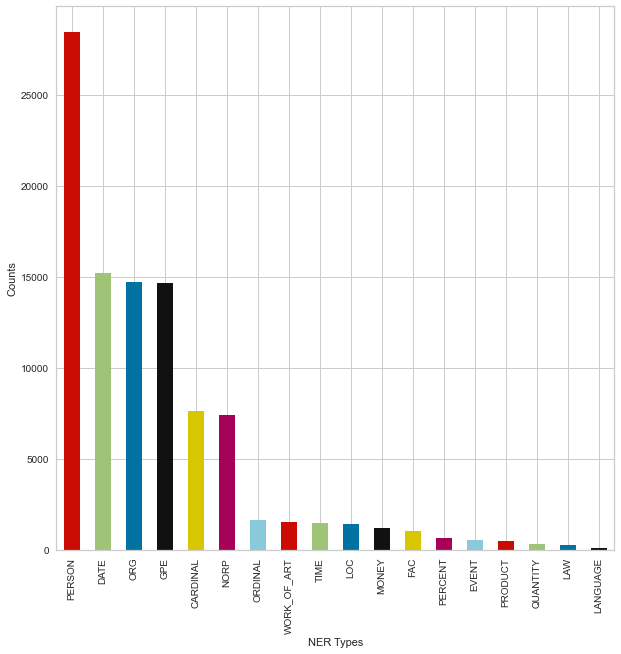

In [45]:
color_list = list('rgbkymc')  #red, green, blue, black, etc.
plt.figure(figsize=(10,10))
plt.xlabel("NER Types")
plt.ylabel("Counts")

ner.NER_Type.value_counts().plot(kind='bar', color = color_list)

<AxesSubplot:xlabel='Top 20 people mentioned', ylabel='Counts'>

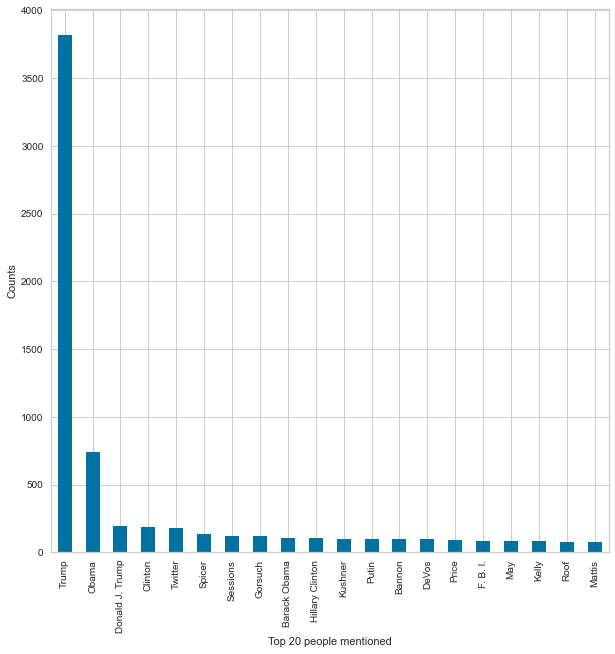

In [46]:
person = ner[ner.NER_Type == 'PERSON']
plt.figure(figsize=(10,10))
plt.xlabel("Top 20 people mentioned")
plt.ylabel("Counts")

person.Text.value_counts()[:20].plot(kind='bar')

<AxesSubplot:xlabel='Top 20 Organizations mentioned', ylabel='Counts'>

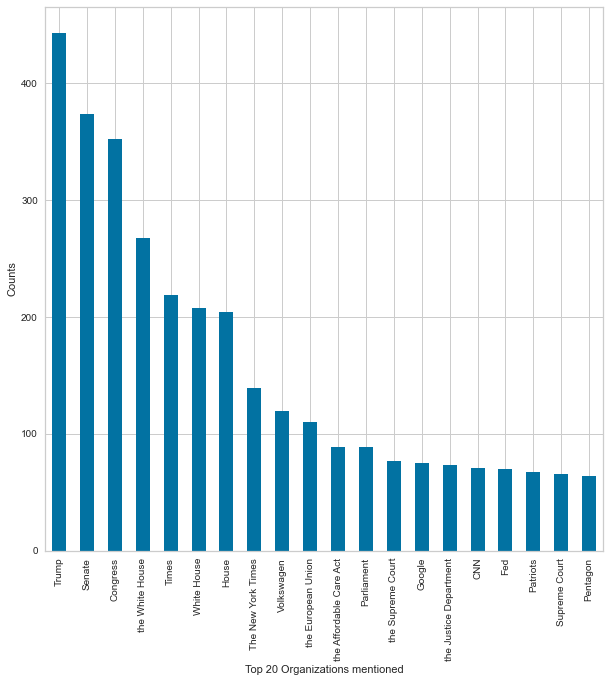

In [47]:
orgs = ner[ner.NER_Type == 'ORG']
plt.figure(figsize=(10,10))
plt.xlabel("Top 20 Organizations mentioned")
plt.ylabel("Counts")

orgs.Text.value_counts()[:20].plot(kind='bar')

<AxesSubplot:xlabel='Top 20 Places mentioned', ylabel='Counts'>

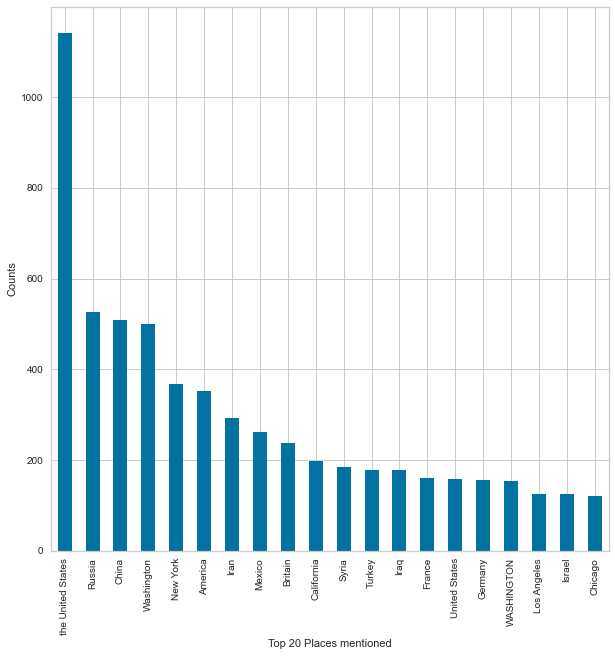

In [48]:
place = ner[ner.NER_Type == 'GPE']
plt.figure(figsize=(10,10))
plt.xlabel("Top 20 Places mentioned")
plt.ylabel("Counts")

place.Text.value_counts()[:20].plot(kind='bar')

## N-Grams

In [56]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

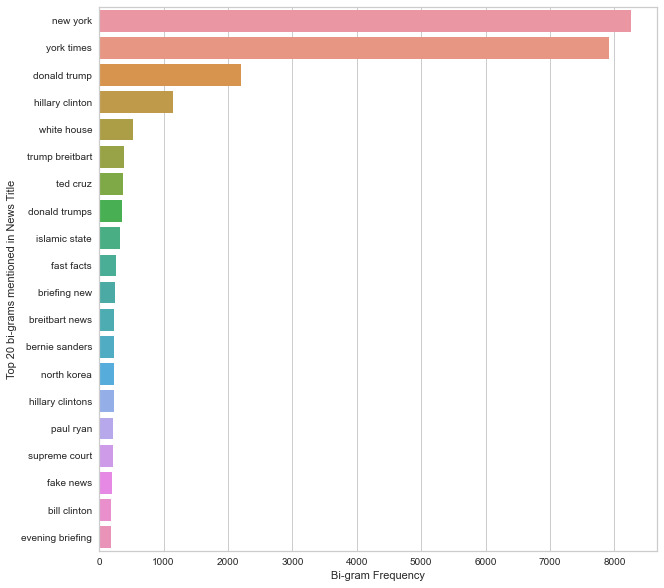

In [57]:
#Bi-grams 

def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:20]

    top_n_bigrams=_get_top_ngram(text,n)[:20]
    x,y=map(list,zip(*top_n_bigrams))
    plt.figure(figsize=(10,10))
    plt.xlabel("Bi-gram Frequency")
    plt.ylabel("Top 20 bi-grams mentioned in News Title")
    sns.barplot(x=y,y=x)


plot_top_ngrams_barchart(title_df['tokenized_title_join'],2)

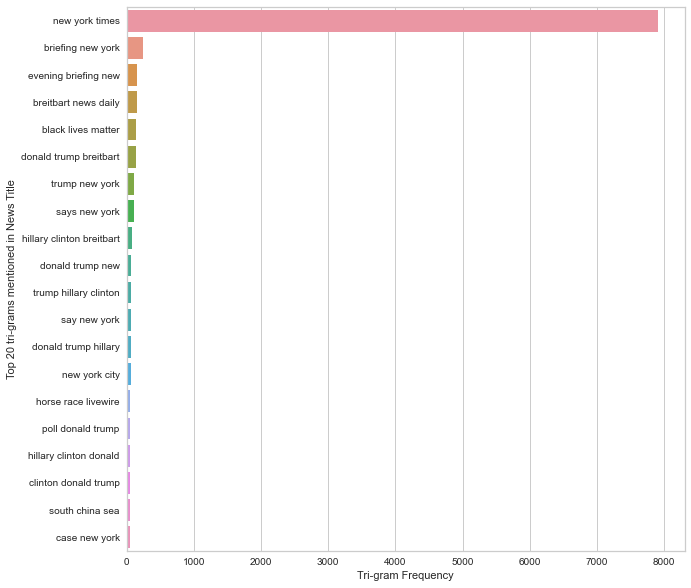

In [58]:
#Tri-grams 

def plot_top_ngrams_barchart(text, n=3):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:20]

    top_n_bigrams=_get_top_ngram(text,n)[:20]
    x,y=map(list,zip(*top_n_bigrams))
    plt.figure(figsize=(10,10))
    plt.xlabel("Tri-gram Frequency")
    plt.ylabel("Top 20 tri-grams mentioned in News Title")
    sns.barplot(x=y,y=x)


plot_top_ngrams_barchart(title_df['tokenized_title_join'],3)

## Thank you